# CPM Trends

In [1]:
#packages
import pandas as pd
import csv
import matplotlib as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import glob
import pycountry
from datetime import datetime

#chaning the number of columns that are displayed. get will tell you how much. 
pd.set_option("display.max_columns",50)
sns.set_style("darkgrid")

pd.options.mode.chained_assignment = None

In [2]:
##### Cleaning

df_asl=pd.read_excel("ASL.xlsx")

#dropping columns
df_asl.drop(columns=["id","status","real_budget","start_date","end_date","url","ad_set_campaign_id",
                       "margin_percentage","facebook_ad_set_id","facebook_ad_account_id","facebook_business_id",
                       "short_url","ad_url_domain_id"], inplace=True)


#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_asl["marginP"] = df_asl.apply(woo, axis=1)
df_asl["marginP"] = df_asl["marginP"].round(2)

# 1. 2017 Q1

## 1.1 30 Ads with the Highest CPM

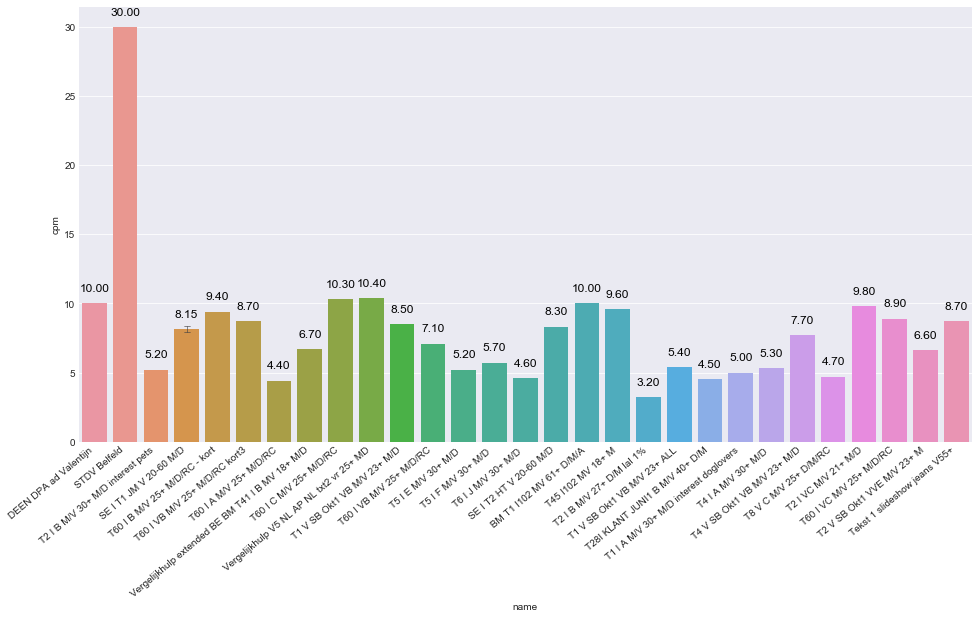

In [3]:
plt.pyplot.figure(figsize=(16,8))
ha=sns.barplot(x="name", y="cpm", data=df_asl.nlargest(30,'ctr'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.2 30 Ads with the best Margin and their CPM

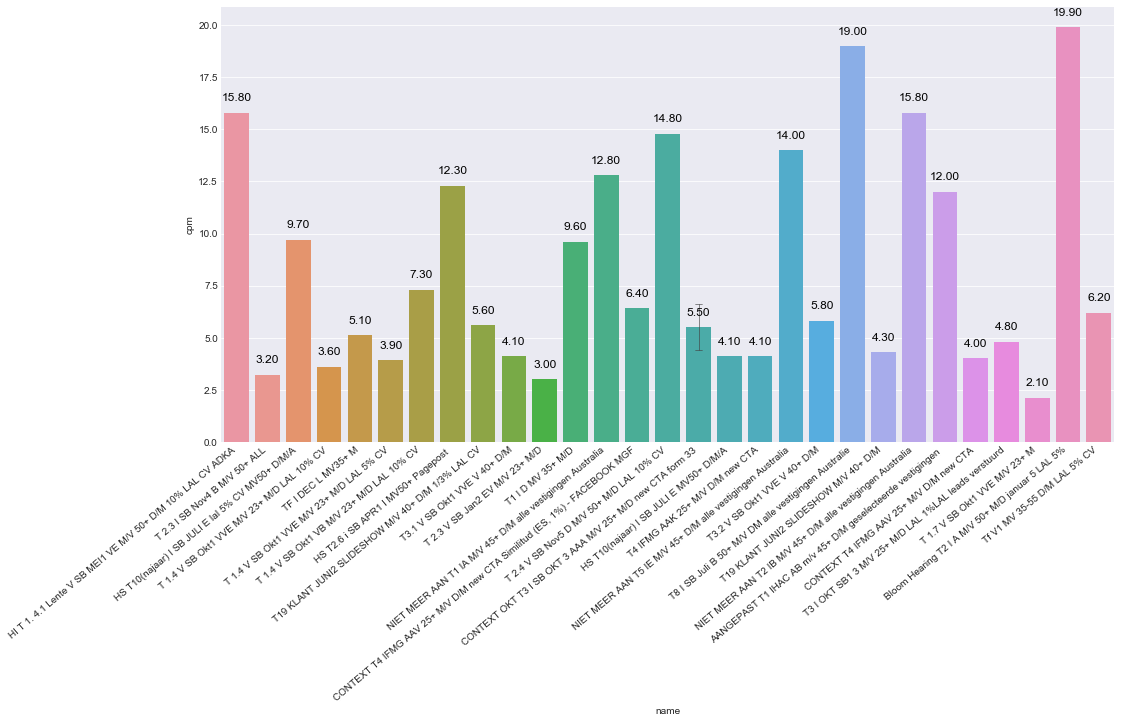

In [4]:
plt.pyplot.figure(figsize=(16,8))
ha=sns.barplot(x="name", y="cpm", data=df_asl.nlargest(30,'margin'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

In [5]:
d = {'CPM': [3.21, 3.39, 3.41, 3.37, 3.36, 3.54, 3.45, 3.71, 3.73, 3.37, 3.80, 3.88, 4.18, 4.129,
            3.53,3.78,3.77,3.60,3.49,3.48,3.33,3.45,3.51,3.72,4.11,4.07,4.22], 
     'Week': ["Week 1","Week 2","Week 3","Week 4","Week 5","Week 6","Week 7","Week 8","Week 9","Week 10","Week 11",
              "Week 12","Week 13","Week 14","Week 1","Week 2","Week 3","Week 4","Week 5","Week 6","Week 7","Week 8","Week 9","Week 10","Week 11",
              "Week 12","Week 13"], 
     "Year": ["2017", "2017", "2017", "2017", "2017", "2017", "2017", "2017", "2017", "2017", "2017", "2017", 
"2017", "2017", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018"] 
    }
df = pd.DataFrame(data=d)

## 1.3 CPM over Weeks

Goes from Jan 1st 2017 to Mar 31st 2017 (the first and last weeks are not full weeks)
The data from 2018 is only from the Hoorn office, since the total couldn't be converted for the other office.

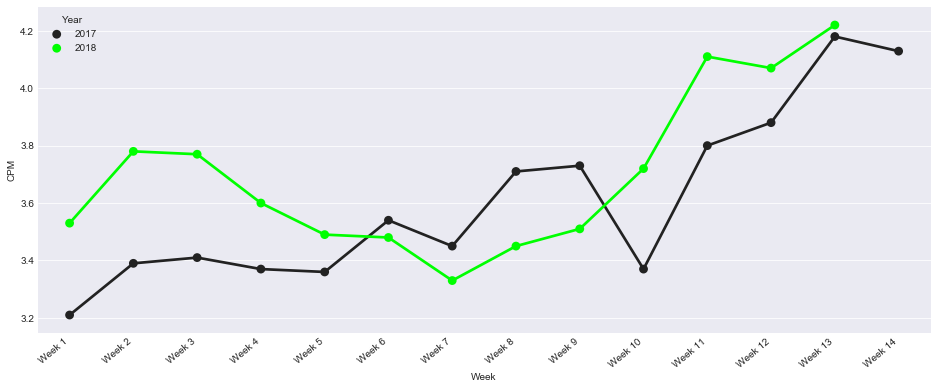

In [6]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="Week", y="CPM", color="lime", hue="Year", errwidth=.5, data=df)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [7]:
e = {'CPM': [3.21,2.99,3.03,3.31,3.50,3.70,3.74,3.50,3.30,3.50,3.31,3.40,3.23,3.71,3.61,3.50,3.18,3.32,3.46,3.42,3.48,3.28,
3.20,3.31,3.34,3.37,3.37,3.55,3.45,3.25,3.69,3.34,3.52,3.79,3.71,3.48,3.24,3.24,3.57,3.50,3.58,3.60,3.48,3.30,3.71,
3.87,3.60,3.82,4.08,3.66, 3.42,3.72,3.94,3.72,3.79,3.92,3.66,3.53,3.30,3.03,3.18,3.62,3.57,3.58,3.44,3.79,3.78,3.82,
4.07,3.86,3.89,4.00,3.96,3.97,4.12,3.90,3.56,3.46,3.28,3.40,3.92,4.57,5.26,5.34,5.03,4.57,4.22,4.00,4.13,4.55,2.86,3.26,3.44,3.62,4.06,3.80,3.65,3.40,3.81,3.74,3.93,3.88,4.03,3.91,3.79,3.79,3.87,3.85,3.94,3.88,3.33,3.31,3.50,
3.51,4.08,3.75,3.85,3.28,3.30,3.54,3.53,3.51,3.59,3.64,3.33,3.28,3.47,3.38,3.43,3.60,3.71,3.58,3.38,3.62,3.50,3.45,
3.14,3.02,3.16,3.12,3.43,3.59,3.58,3.54,3.62,3.35,3.66,3.59,3.66,3.26,3.34,3.59,3.46,3.44,3.54,3.75,4.08,3.94,3.84,
3.51,3.72,4.15,4.56,4.68,4.07,4.00,3.64,3.65,4.06,4.20,4.71,3.90,3.98,4.02,4.01,4.40,4.51,4.43,3.97,3.91], 
     'Day': ["January 1","January 2","January 3","January 4","January 5","January 6","January 7","January 8","January 9",
             "January 10","January 11","January 12","January 13","January 14","January 15","January 16","January 17","January 18",
             "January 19","January 20","January 21","January 22","January 23","January 24","January 25","January 26",
             "January 27","January 28","January 29","January 30","January 31","Febuary 1","Febuary 2","Febuary 3",
             "Febuary 4","Febuary 5","Febuary 6","Febuary 7","Febuary 8","Febuary 9","Febuary 10","Febuary 11",
             "Febuary 12","Febuary 13","Febuary 14","Febuary 15","Febuary 16","Febuary 17","Febuary 18","Febuary 19",
             "Febuary 20","Febuary 21","Febuary 22","Febuary 23","Febuary 24","Febuary 25","Febuary 26","Febuary 27",
             "Febuary 28","March 1","March 2","March 3","March 4","March 5","March 6","March 7","March 8","March 9","March 10",
             "March 11","March 12","March 13","March 14","March 15","March 16","March 17","March 18","March 19","March 20",
             "March 21","March 22","March 23","March 24","March 25","March 26","March 27","March 28","March 29",
             "March 30","March 31","January 1","January 2","January 3","January 4","January 5","January 6","January 7","January 8","January 9",
             "January 10","January 11","January 12","January 13","January 14","January 15","January 16","January 17","January 18",
             "January 19","January 20","January 21","January 22","January 23","January 24","January 25","January 26",
             "January 27","January 28","January 29","January 30","January 31","Febuary 1","Febuary 2","Febuary 3",
             "Febuary 4","Febuary 5","Febuary 6","Febuary 7","Febuary 8","Febuary 9","Febuary 10","Febuary 11",
             "Febuary 12","Febuary 13","Febuary 14","Febuary 15","Febuary 16","Febuary 17","Febuary 18","Febuary 19",
             "Febuary 20","Febuary 21","Febuary 22","Febuary 23","Febuary 24","Febuary 25","Febuary 26","Febuary 27",
             "Febuary 28","March 1","March 2","March 3","March 4","March 5","March 6","March 7","March 8","March 9","March 10",
             "March 11","March 12","March 13","March 14","March 15","March 16","March 17","March 18","March 19","March 20",
             "March 21","March 22","March 23","March 24","March 25","March 26","March 27","March 28","March 29",
             "March 30","March 31"],
     "Year": ["2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017",
             "2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017",
             "2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017",
             "2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017",
             "2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017",
             "2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017","2017",
             "2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018",
             "2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018",
             "2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018",
             "2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018",
             "2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018",
             "2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018","2018"]
    }
df = pd.DataFrame(data=e)

## 1.4 CPM over Days

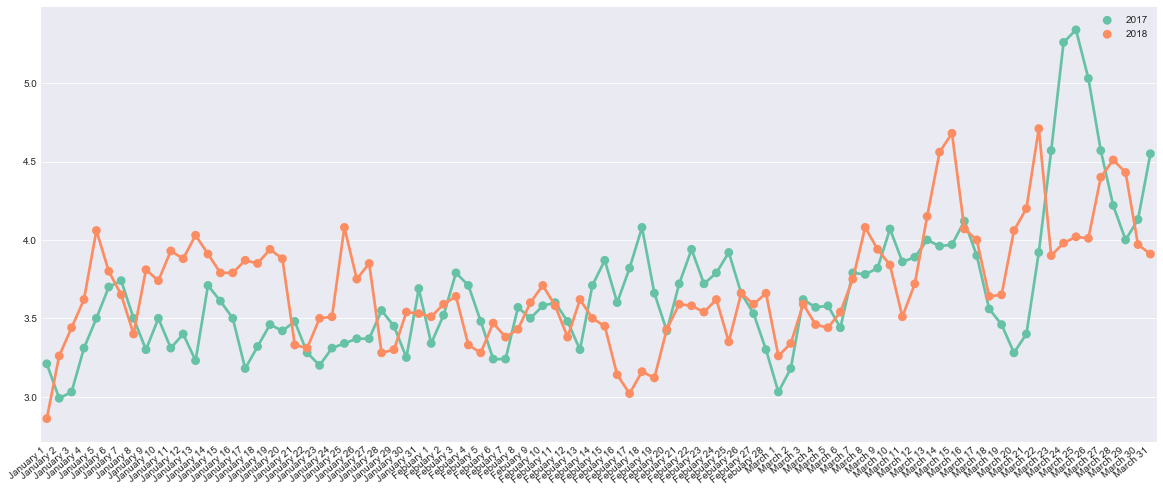

In [8]:
plt.pyplot.figure(figsize=(20,8))
ha=sns.pointplot(x="Day", y="CPM", color="purple", palette="Set2", hue="Year", errwidth=.5, data=e)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

# 2. Lifetime CPM 

Average CPM per country

In [9]:
df_l=pd.read_excel("lifetime_campaign.xlsx")
#dropping columns
df_l.drop(columns=["id","insert_time","export_time","status","ad_set_manager_id","client_id","ap_campaign_id",
                  "facebook_business_id","url","contract_range","salesforce_oppurtunity_id"], inplace=True)
df_l["country"]=df_l["iso_code"].str.split("_").str[1]
def get_country_code(x):
    return pycountry.countries.get(alpha_2=x).name
df_l["country"] = df_l["country"].apply(get_country_code)
df_l.drop(columns=["iso_code"], inplace=True)

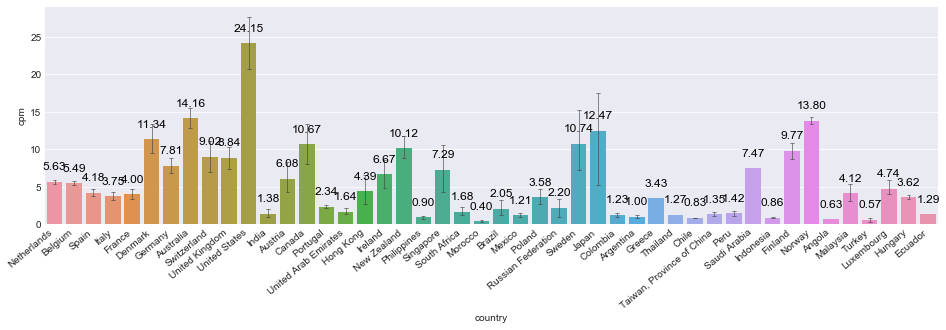

In [10]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="country", y="cpm", data=df_l, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

# 3. Countries

In [11]:
sheetnames=glob.glob("NL_*.xlsx")
list_of_dfs = [pd.read_excel(sheet) for sheet in sheetnames]
for dataframe, sheet in zip(list_of_dfs, sheetnames):
    dataframe["mon"] = sheet
df_nl = pd.concat(list_of_dfs, ignore_index=True) 
df_nl["month"]=df_nl["mon"].str.split("_").str[1]
df_nl.drop(columns=["insert_time","export_time","business_name","iso_code","id","status","ad_set_manager_id","client_id","ap_campaign_id","ad_set_campaign_group_id",
                      "notification_stop_spend","notification_stop_spend_threshold","margin_percentage",
                      "facebook_business_id","url","contract_range","salesforce_oppurtunity_id","mon"], inplace=True)
order=["15 Jun","15 Jul","15 Aug","15 Sep","15 Oct","15 Nov","15 Dec",
       "16 Jan","16 Feb","16 Mar","16 Apr","16 May","16 Jun","16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec",
       "17 Jan","17 Feb","17 Mar","17 Apr","17 May","17 Jun","17 Jul","17 Aug","17 Sep","17 Oct","17 Nov","17 Dec",
       "18 Jan","18 Feb","18 Mar","18 Apr","18 May","18 Jun"]

## 3.1 Netherlands

### *Average CPM per Campaign over time*

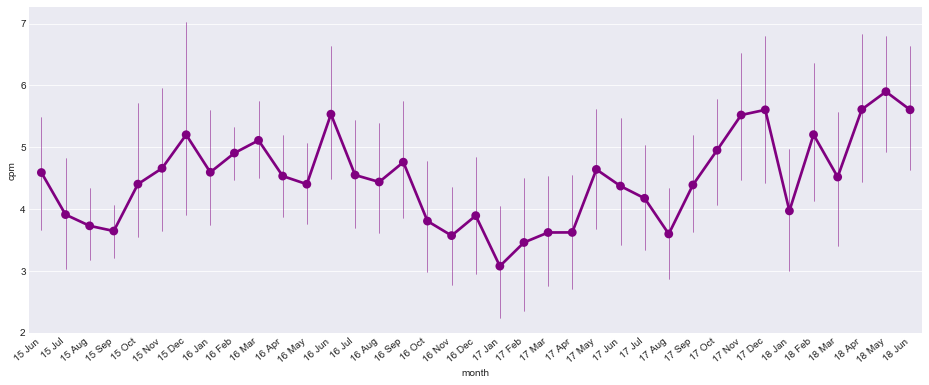

In [12]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpm", color="purple", errwidth=.5, data=df_nl, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [13]:
#total by marketer
df_nl["total"]=1
df_nl_total=df_nl.groupby(by=['month']).sum()
df_nl_total["Month"]=df_nl_total.index

In [14]:
f = {'CPM': [4.90,4.22,3.71,3.72,4.11,4.13,4.28,3.33,4.05,4.57,3.83,4.09,4.45,4.28,3.80,3.98,4.20,4.41,5.23,3.57,4.40,4.26,5.38,
 5.00,4.95,4.39,3.82,4.98,5.44,6.03,5.73,4.33,4.46,4.88,5.15,5.72,5.36], 
     'Month': ["15 Jun","15 Jul","15 Aug","15 Sep","15 Oct","15 Nov","15 Dec",
       "16 Jan","16 Feb","16 Mar","16 Apr","16 May","16 Jun","16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec",
       "17 Jan","17 Feb","17 Mar","17 Apr","17 May","17 Jun","17 Jul","17 Aug","17 Sep","17 Oct","17 Nov","17 Dec",
       "18 Jan","18 Feb","18 Mar","18 Apr","18 May","18 Jun"],
    }
df_tots = pd.DataFrame(data=f)

### *CPM per Month*

Unfortunately this data was collected manually through BERT, since there is no way to calculate the CPM from exported BERT data. 

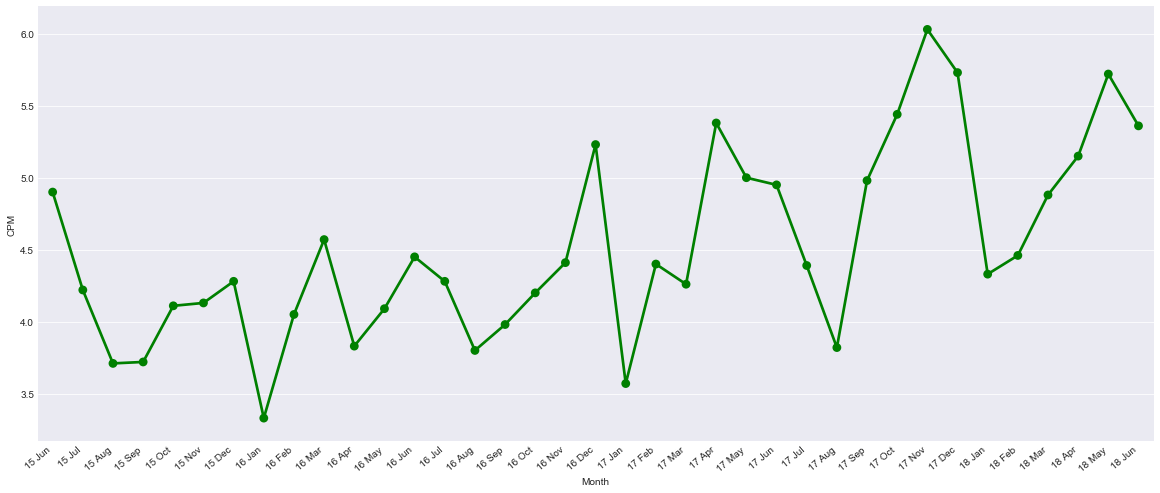

In [15]:
plt.pyplot.figure(figsize=(20,8))
ha=sns.pointplot(x="Month", y="CPM", color="green", errwidth=.5, data=df_tots)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

### *Total CPM per Month* 

I'm not sure how useful this is since it just ads up the CPMs for all campaigns within a month (this means that months with more campaigns could appear higher even if they have lower CPMs). 

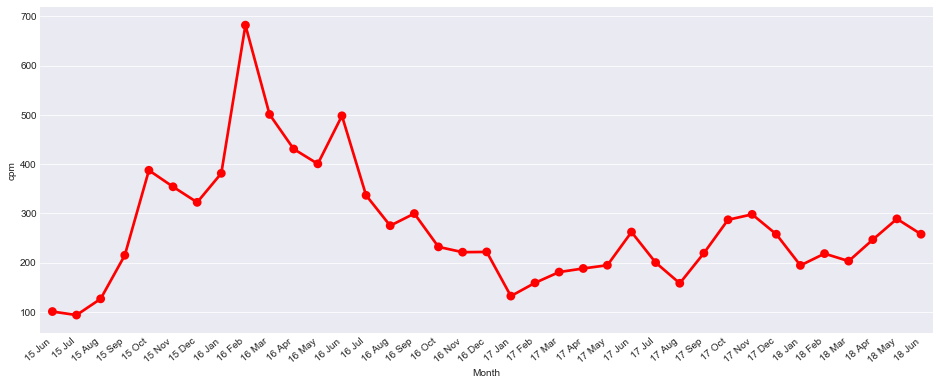

In [16]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="Month", y="cpm", color="red", errwidth=.5, data=df_nl_total, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [17]:
#lifetime nl campaign (ithink()
nl=pd.read_excel("nl.xlsx")
#dropping columns
nl.drop(columns=["id","insert_time","export_time","status","ad_set_manager_id","client_id","ap_campaign_id",
                  "facebook_business_id","url","contract_range","salesforce_oppurtunity_id","ad_set_campaign_group_id",
                "notification_stop_spend","notification_stop_spend_threshold"], inplace=True)

In [22]:
sheetnames=glob.glob("MP_*.csv")
list_of_dfs = [pd.read_csv(sheet) for sheet in sheetnames]
for dataframe, sheet in zip(list_of_dfs, sheetnames):
    dataframe["mon"] = sheet
MP = pd.concat(list_of_dfs, ignore_index=True) 
MP["month"]=MP["mon"].str.split("_").str[1]
MP2=MP.loc[MP["Placement"]!="All"]

In [19]:
order2=["16 May","16 Jun","16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec",
       "17 Jan","17 Feb","17 Mar","17 Apr","17 May","17 Jun","17 Jul","17 Aug","17 Sep","17 Oct","17 Nov","17 Dec",
       "18 Jan","18 Feb","18 Mar","18 Apr","18 May","18 Jun"]

# 4. Motto Products NL - Vergelijkhulp (example with placement)

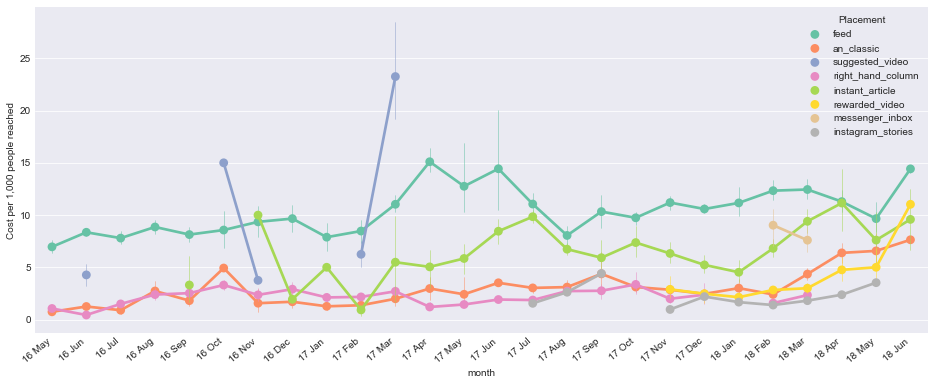

In [23]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="Cost per 1,000 people reached", hue="Placement", palette="Set2", color="red", errwidth=.5, data=MP2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [24]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>